# Linear Regression & Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
seed = 1
num_points = 40

np.random.seed(seed)

x = np.random.random_sample((num_points,)) * 5
epsilon = 4 * (np.random.rand(num_points) - 0.5)
y = 2 * x + epsilon

In [3]:
lr = LinearRegression()
lr.fit(x[:,np.newaxis], y)

pred = lr.predict(x[:,np.newaxis])
line = lr.predict(np.arange(6)[:, np.newaxis])

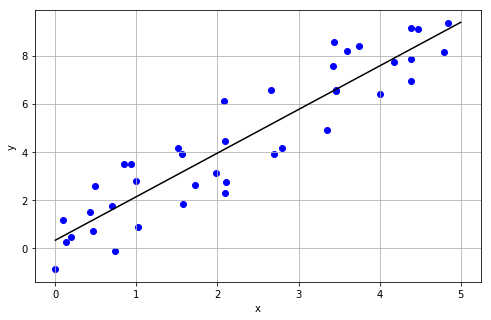

In [4]:
fig = plt.figure(figsize=(8, 5))

plt.scatter(x, y, c='blue')
plt.plot(line, c='black')

plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')

In [5]:
sigma = 0.5
index = np.argsort(x)[::5]

x_normal = []
y_normal = []
for i in index:
    y_range = np.arange(pred[i]-2, pred[i]+2.1, 0.1)
    x_range = x[i] + 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-1/(2.0*sigma**2) * (y_range - pred[i])**2) * 0.3
    
    x_normal.append(x_range)
    y_normal.append(y_range)

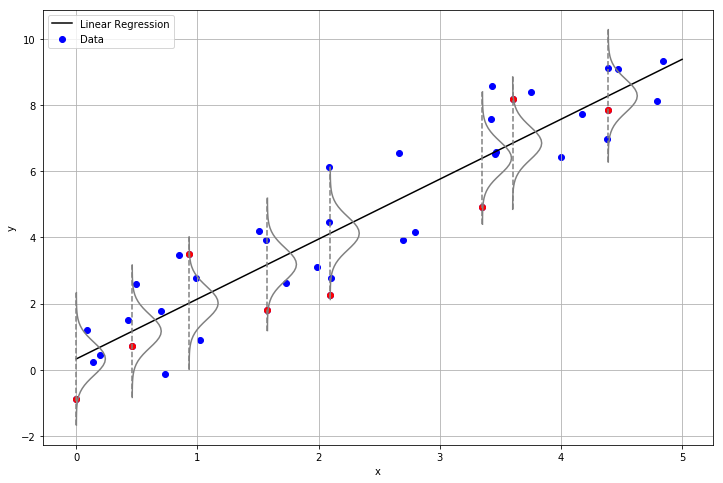

In [6]:
fig = plt.figure(figsize=(12, 8))

plt.scatter(x, y, c='blue', label='Data')
plt.plot(line, c='black', label='Linear Regression')

for i in range(len(x_normal)):
    plt.scatter(x[index[i]], y[index[i]], c='red')
    plt.plot(x_normal[i], y_normal[i], c='grey')

for i in range(len(x_normal)):
    ymin = (y_normal[i].min() - plt.ylim()[0])/(plt.ylim()[1] - plt.ylim()[0])
    ymax = (y_normal[i].max() - plt.ylim()[0])/(plt.ylim()[1] - plt.ylim()[0])
    plt.axvline(x=x[index[i]], ymin=ymin, ymax=ymax, c='grey', linestyle='--')
    
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.legend()

plt.savefig('regression.png')